# Discovery notebook

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
from IPython.display import display, HTML
from tabulate import tabulate

plt.rcParams["figure.dpi"] = 100

Let's define some useful functions. 

In [ ]:
# Taken from https://www.kaggle.com/andradaolteanu/siim-covid-19-box-detect-dcm-metadata
def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(round(_x, 5), round(_y, 5), format(round(value, 5), ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [3]:
cab = pd.read_csv("Cab_Data.csv")
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

As expected, two different companies. What are their proportions? 

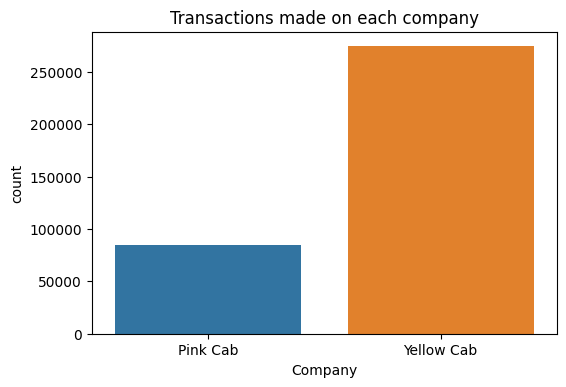

In [43]:
sns.countplot(x=cab.Company)
_ = plt.title("Transactions made on each company")

There are more transactions made with `Yellow Cab` company than `Pink Cab`. 

In [5]:
cab.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [13]:
cab.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [6]:
len(cab)

359392

In [20]:
cab.groupby("City")["Transaction ID"].count()

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction ID, dtype: int64

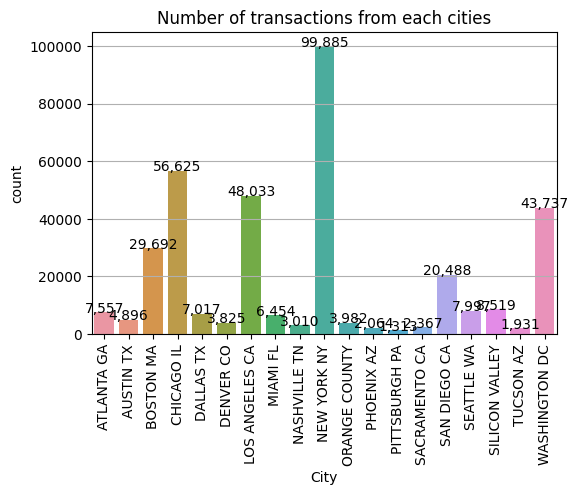

In [95]:
plt.figure(dpi=100)
ax = sns.countplot(x=cab.City)
show_values_on_bars(ax)
plt.grid(which="both", axis="y")
plt.title("Number of transactions from each cities")
_ = plt.xticks(rotation=90)

Most data comes from a few cities, namely BOSTON MA, CHICAGO IL, LOS ANGELES CA, NEW YORK NY, SAN DIEGO CA, and WASHINGTON DC being significant from the graph. 

Next, let's check on `KM travelled`. 

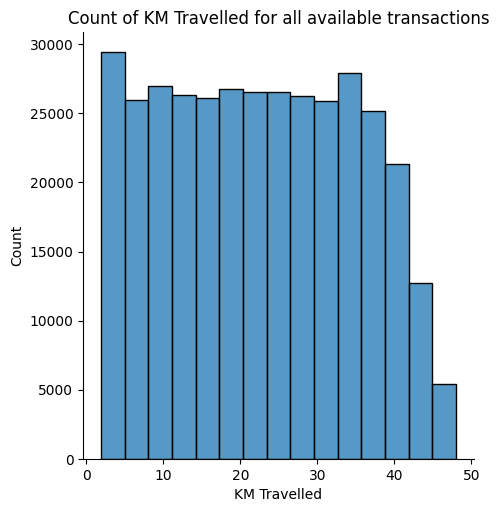

In [72]:
sns.displot(cab["KM Travelled"], bins=15)
_ = plt.title("Count of KM Travelled for all available transactions")

It is noted that there are *various distance travelled* before 40KM, and those after 40KM significantly reduce the number of transactions. Is there are relationship between which type of company and their distance travelled? 

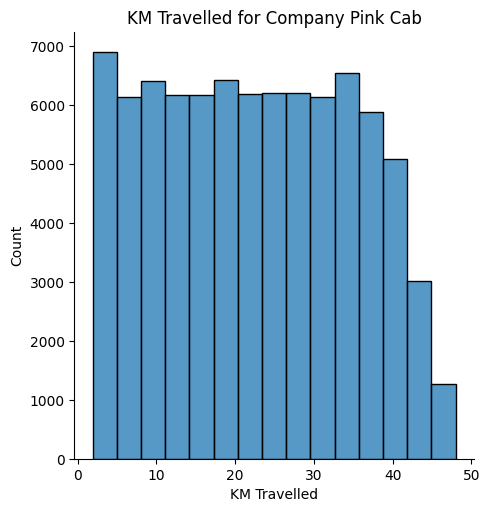

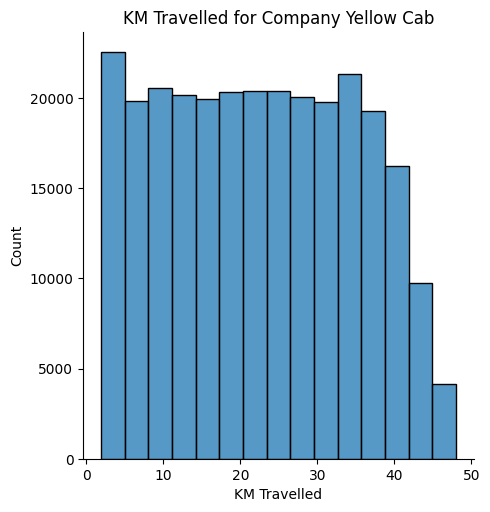

In [73]:
for i in cab.groupby("Company")["KM Travelled"]: 
    sns.displot(i[1], bins=15)
    plt.title(f"KM Travelled for Company {i[0]}")
    plt.show()

Nope, although one have less people use, their KM travelled aren't affected by which company. Both company fetch about equal distributions for various distances. 

How about company and their distributions? What cities do they fetch? 

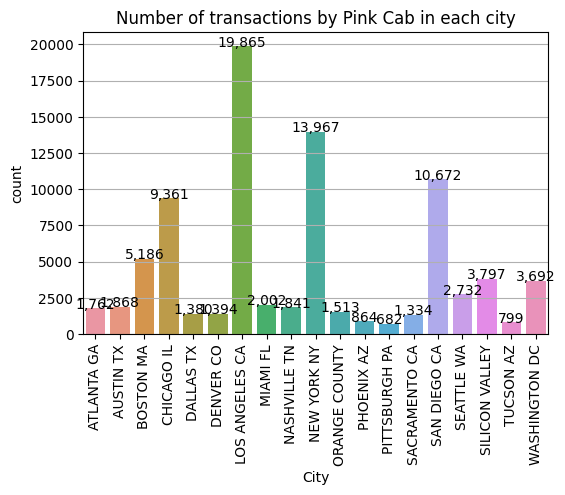

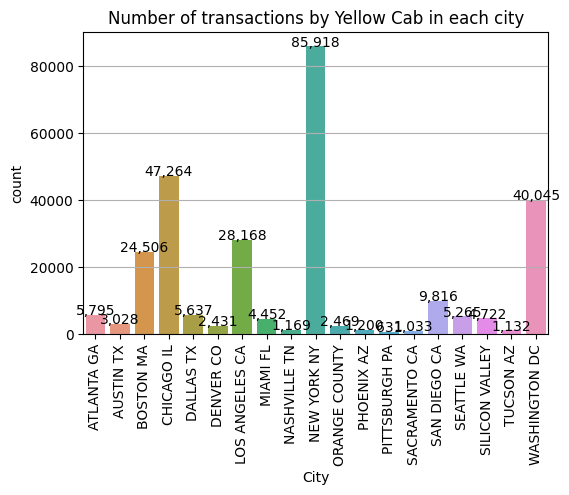

In [94]:
for i in cab.groupby("Company")["City"]: 
    ax = sns.countplot(x=i[1])
    show_values_on_bars(ax, h_v="v", space=0.4)
    plt.grid(which="both", axis="y")
    plt.title(f"Number of transactions by {i[0]} in each city")
    plt.xticks(rotation=90)
    plt.show()

Overall, those cities with most cab transactions still significant. However, there are some where demographics are different. This is especially true for the ratio. For example, there is a higher ratio of people choosing Yellow Cab over Pink Cab in NEW YORK NY (about 6:1), while in LOS ANGELES CA, it has a smaller ratio difference of about 3:2 for Yellow Cab to Pink Cab respectively. Other cities may have different distributions as well, and sometimes more or less 1:1 distribution. 

Next, looking at price charged and their distributions. 

In [102]:
cab["Price Charged"]

2048.03

Let's make the bins more or less have width of 100. 

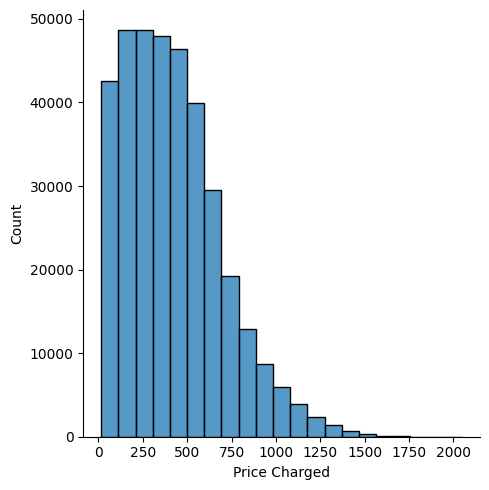

In [103]:
sns.displot(x=cab["Price Charged"], bins=21)

Looks like most pricing charges between 100-600 approximately, after which it decreases logarithmically. This may have (linear) relationship with distance? Let's check by getting their ratio and plot their ratio. 

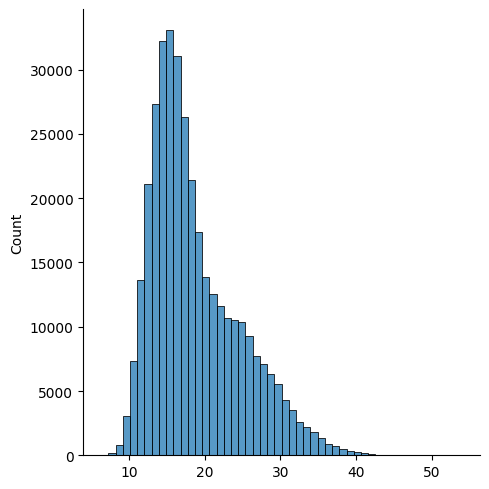

In [107]:
sns.displot(x=cab["Price Charged"] / cab["KM Travelled"], bins=50)

No perfect relationship, we got a Gaussian relationship instead. 

How much does each of the company charges? Does one charge more than the other? 

In [118]:
from tabulate import tabulate

In [133]:
g = cab.groupby("Company")["Price Charged"]
headers = g.mean().index.tolist()
print("Mean:")
display(HTML(tabulate([g.mean().values], headers=headers, tablefmt="html")))
print("\nMedian:")
display(HTML(tabulate([g.median().values], headers=headers, tablefmt="html")))
print("\nStandard Deviation:")
display(HTML(tabulate([g.std().values], headers=headers, tablefmt="html")))

Mean:


Pink Cab,Yellow Cab
310.801,458.182



Median:


Pink Cab,Yellow Cab
298.06,425.06



Standard Deviation:


Pink Cab,Yellow Cab
181.996,288.386


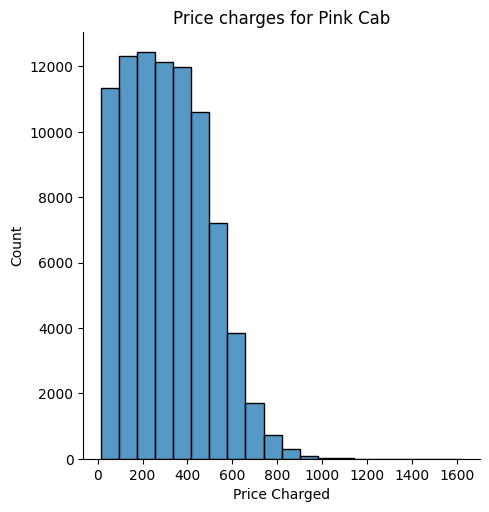

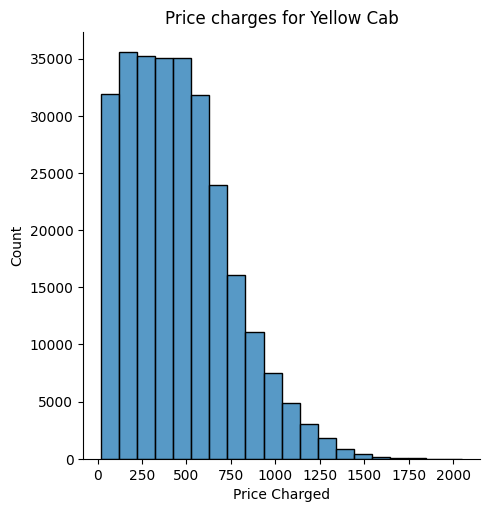

In [113]:
for i in cab.groupby("Company")["Price Charged"]:
    sns.displot(x=i[1], bins=20)
    plt.title(f"Price charges for {i[0]}")

Though more people uses Yellow Cab, it has higher mean and median charges. And despite the higher charges, more people still uses their services. The exact reason is unknown. **Opinionwise (guessing)** would be they could have better services, better facilities (cleaner and newer vehicle for example), and many other reasons. 

How about price charge dependent on the city? Is it more expensive in a certain city than another? 

Note: We won't answer the above question because it's not directly related to whether to invest in one company or another. We would leave it for now. 

Finally, we have `Cost of Trip` to check. From one's understanding, this is how much price to pay for each trip, so `Price Charged` - `Cost of Trip` is the income earned by the company. We will deal with `Cost of Trip` first before dealing with *income*. 

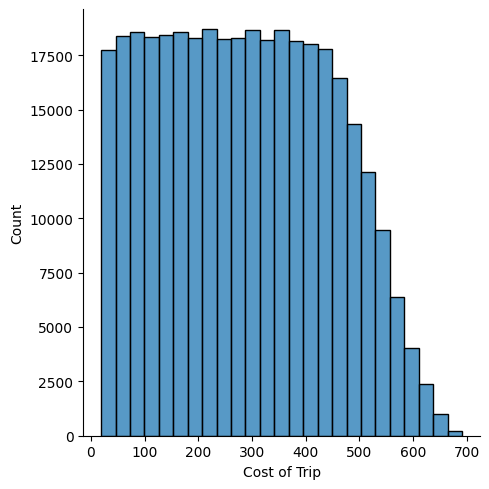

In [135]:
sns.displot(x=cab["Cost of Trip"], bins=25)

In [137]:
cab["Cost of Trip"].max(), cab["Price Charged"].max()

(691.2, 2048.03)

We can see that the maximum `Cost of Trip` and `Price Charged` is a big difference, so they earned different amounts. Let's check their mean, median and standard deviation for `Cost of Trip`, just like how we did for `Price Charged`. 

In [161]:
g = cab.groupby("Company")["Cost of Trip"]
headers = g.mean().index.tolist()
print("Mean:")
display(HTML(tabulate([g.mean().values], headers=headers, tablefmt="html")))
print("\nMedian:")
display(HTML(tabulate([g.median().values], headers=headers, tablefmt="html")))
print("\nStandard Deviation:")
display(HTML(tabulate([g.std().values], headers=headers, tablefmt="html")))

Mean:


Pink Cab,Yellow Cab
248.149,297.922



Median:


Pink Cab,Yellow Cab
246.33,295.596



Standard Deviation:


Pink Cab,Yellow Cab
135.403,162.549


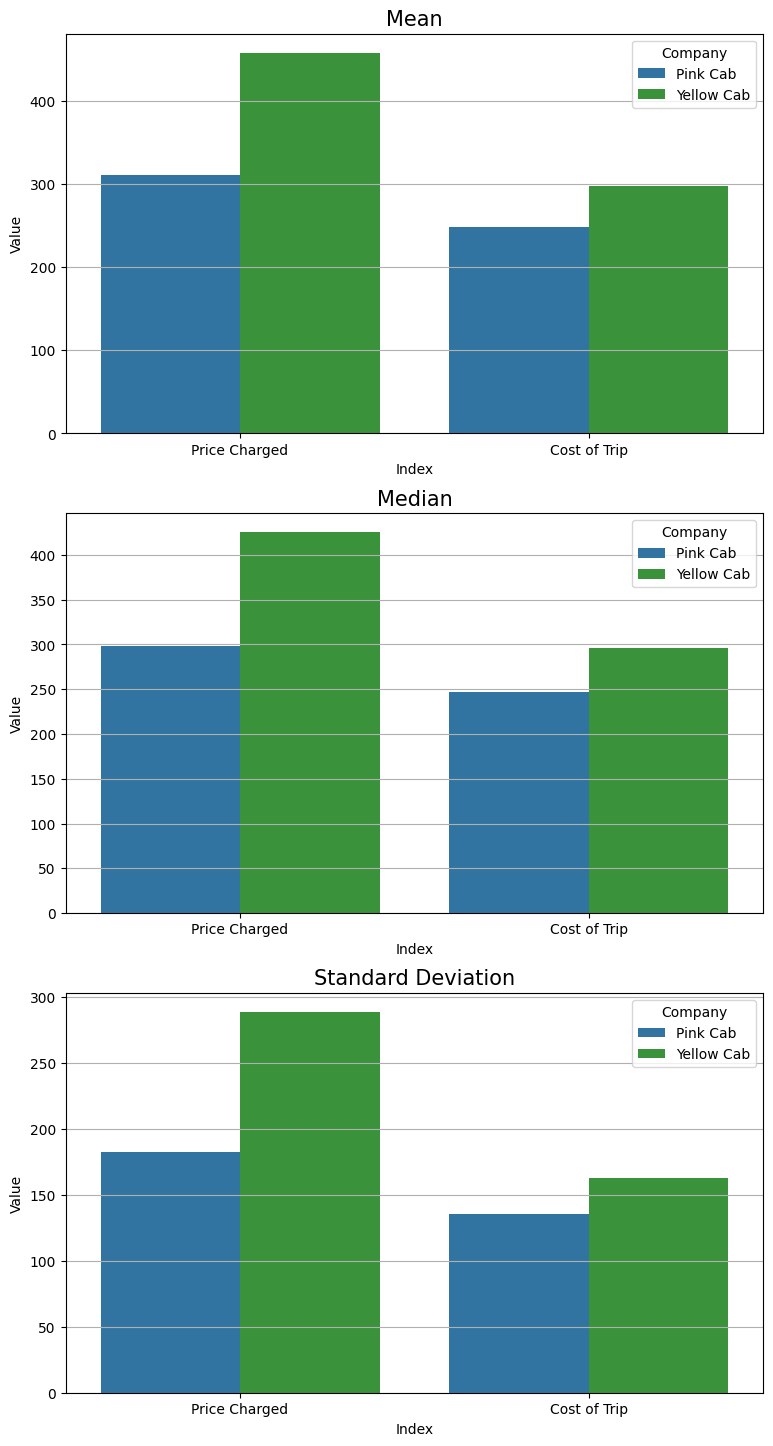

In [259]:
g = cab.groupby("Company")["Price Charged"]
h = cab.groupby("Company")["Cost of Trip"]

mean = pd.DataFrame([g.mean(), h.mean()])
median = pd.DataFrame([g.median(), h.median()])
std = pd.DataFrame([g.std(), h.std()])

fig, axs = plt.subplots(3, 1, figsize=(9, 18))
dfs = [mean, median, std]
titles = ["Mean", "Median", "Standard Deviation"]
my_colors = np.array(plt.get_cmap("tab10").colors)[np.array([0, 2])]

for ax, df_temp, title in zip(axs, dfs, titles):
    df_temp.reset_index(level=0, inplace=True)
    df_temp = df_temp.melt(id_vars="index").rename(columns=str.title)
    sns.barplot(x="Index", y="Value", hue="Company", 
                data=df_temp, ax=ax, ci=None,
                palette=my_colors)
    ax.set_title(title, fontsize=15)
    ax.grid(axis="y")

We see that the `Cost of Trip` is higher for `Yellow Cab`, resulting in them charging higher numbers. However, they also have significantly more earnings because the ratio of `Price Charged` between `Yellow Cab` and `Pink Cab` is higher than the ratio of `Cost of Trip`. We can see this by the height of the bars by eye. 

Let's see how much they earned, on average (their mean, median, and std).

In [240]:
cab["income"] = cab["Price Charged"] - cab["Cost of Trip"]

In [256]:
g = cab.groupby("Company")["income"]
g = pd.DataFrame([g.mean(), g.median(), g.std()])
g.index = ["mean", "median", "std"]
g

Company,Pink Cab,Yellow Cab
mean,62.652174,160.259986
median,41.500000,102.000000
std,77.590378,171.823833


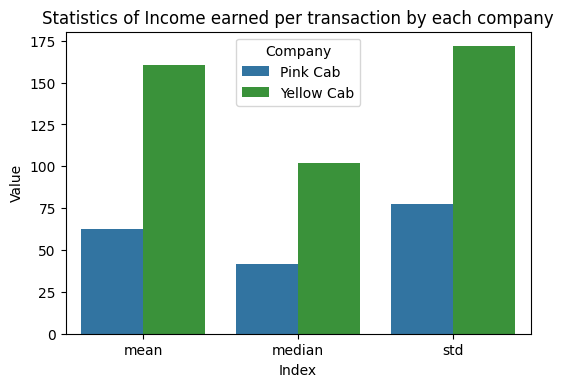

In [257]:
g.reset_index(level=0, inplace=True)
g = g.melt(id_vars="index").rename(columns=str.title)
sns.barplot(x="Index", y="Value", hue="Company", 
                data=g, ci=None, palette=my_colors)
_ = plt.title("Statistics of Income earned per transaction by each company")

# City

In [45]:
city = pd.read_csv("City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
len(city), len(cab.City.unique())

(20, 19)

Which city is missing from the `Cab_Data.csv`? 

In [10]:
set(city.City.tolist()).difference(set(cab.City.unique()))

{'SAN FRANCISCO CA'}

In [11]:
transaction = pd.read_csv("Transaction_ID.csv")
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [14]:
transaction.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

There's a mismatch between transaction ID numbers and `Cab_Data.csv`'s transaction ID numbers, one having less unique values than the others. We also notice that we have one missing city in `Cab_Data.csv`, hence the missing `Transaction ID` may be from this missing city. 

In [15]:
len(transaction)

440098

Asserted that `Transaction ID` is unique (each row different). 

In [18]:
len(transaction) - len(cab), (len(transaction) - len(cab)) / len(transaction) * 100

(80706, 18.3381883126031)

Above shows how much `Transaction ID` missing, and its percentage to the total `Transaction ID` available (which is 18.34% missing). 